# 지도 시각화 Folium

- 현재 사용의 편의성이나 활발한 기능 개선 등으로 Folium이 만족도가 높은 편
- conda install -c conda-forge folium
- Folium은 기본적으로 크롬에서 동작이 가장 좋음
- 위도, 경도
- 지도를 html로 저장 가능
- 스타일을 tiles 옵션으로 지정
- 마커 추가 가능 popup => add_to
- 다양한 아이콘 지원



In [44]:
!pip install folium
#!pip install charset
#!pip install charset-normalizer

In [45]:
import folium
import pandas as pd 
import json

### folium.Map()

```
location: tuple or list, default None
    Latitude and Longitude of Map (Northing, Easting).
```

In [46]:
m = folium.Map(location=[36.60953187384777, 127.29001164256225], zoom_start = 15) # zoom_start = 0 - 18
m 

### save()

In [47]:
m.save('./folium.html')

In [48]:
!ls

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


### tiles option

```
- 'OpenStreetMap'
- 'Mapbox Bright' (Limited levels of zoom for free tiles)
- 'Mapbox Control Room' (Limited levels of zoom for free tiles)
- 'Stamen' (Terrain, Toner, and Watercolor)
- 'Cloudmade' (Must pass API key)
- 'Mapbox' (Must pass API key)
- 'CartoDB' (positron and dark_matter)

```

In [49]:
m = folium.Map(
    location=[36.60953187384777, 127.29001164256225], 
    zoom_start = 14,   
    tiles = 'OpenStreetMap' #스타일설정
    ) 
m 

### folium.Marker()
- 지도에 마커 생성


In [50]:
m = folium.Map(
    location=[39.940739341484885, 116.39119111356364], 
    zoom_start = 14,   
    tiles = 'OpenStreetMap' #스타일설정
    ) 

#북경4중 
folium.Marker((39.931310676780384, 116.37782353347843)).add_to(m)
m 

#  북경대학교
folium.Marker(
    location=[39.987036284407274, 116.30591681203019],     
    popup='<b>Peking University</b>'
).add_to(m)
m 

# tooltip
folium.Marker(
    location=[39.987036284407274, 116.30591681203019],     
    popup='<b>Peking University</b>', #눌러야함   
    tooltip = '<i>북경대</i>' #마우스갖다되면
).add_to(m)
m 

# html
folium.Marker(
    location=[39.936217863763346, 116.45508707251415],     
    popup="<a href ='https://www.naver.com/' target=_'blink'>Sanlitun</a>", #눌러야함   
    tooltip = '<i>싼리툰</i>' #마우스갖다되면
).add_to(m)
m 

### folium.Icon()

In [51]:
m = folium.Map(
    location=[39.940739341484885, 116.39119111356364],  #북경
    zoom_start = 14,   
    tiles = 'OpenStreetMap' #스타일설정
    ) 

# icon basic
folium.Marker((39.931310676780384, 116.37782353347843),
icon = folium.Icon(color='black',icon='info-sign')).add_to(m)
m 

# icon icon_color
folium.Marker(
    location=[39.987036284407274, 116.30591681203019],     
    popup='<b>Peking University</b>',   
    icon= folium.Icon(
        color = 'red',    
        icon_color = 'white',   
        icon='cloud')
).add_to(m)
m 


# Icon Custom
folium.Marker(
    location=[39.95736145751822, 116.45610509668816],      
    popup="싼위엔치아오", #눌러야함   
    tooltip = 'Icon custom' ,#마우스갖다되면
    icon = folium.Icon(
        color = 'black',   
        icon_color = 'yellow',    
        icon ='android',  # 다양한 아이콘 모양 위해 fontawesome사이트 확인 가능
        angle = 50,    
        prefix='fa' #가끔씩 이걸 사용해야(fa값을 주어야) 뜨는 icon들이 있음.
    )
).add_to(m)
m 

### folium.Choropleth()

In [54]:
import json

In [55]:
state_data = pd.read_csv('../../data/210923 - 02. Analysis Seoul Crime/data/02. US_Unemployment_Oct2012.csv')
state_data.tail(2) 

,State,Unemployment
48,WI,6.8
49,WY,5.1


In [61]:
m = folium.Map([43,-102],zoom_start=3)
folium.Choropleth(
    geo_data = '../../data/210923 - 02. Analysis Seoul Crime/data/02. us-states.json', #경계선 좌표값이 담긴 데이터
    data=state_data, #Series or DataFrame
    columns = ['State','Unemployment'], #DataFrame Columns
    key_on = 'feature.id',    
    fill_color = 'BuPu',     
    fill_opacity = 0.5, #0-1
    line_opacity = 0.5, #0-1
    legend_name = 'Unemployment rate(%)' 
).add_to(m)

m  

In [73]:
### 아파트 유형 지도 시각화
df = pd.read_csv('../../data/210923 - 02. Analysis Seoul Crime/data/02. 서울특별시 동작구_주택유형별 위치 정보 및 세대수 현황_20210825.csv',encoding='cp949') 
df.head(2) 

,연번,분류,건물명,행정동,주소,세대수,위도,경도
0,1,아파트,노량진우성,노량진1동,서울특별시 동작구 만양로8길 50,901,37.510304,126.946866
1,2,아파트,노량진삼익,노량진1동,서울특별시 동작구 만양로 84,175,37.511367,126.945226


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      167 non-null    int64  
 1   분류      167 non-null    object 
 2   건물명     167 non-null    object 
 3   행정동     167 non-null    object 
 4   주소      167 non-null    object 
 5   세대수     167 non-null    int64  
 6   위도      163 non-null    float64
 7   경도      163 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.6+ KB


In [75]:
#NaN 데이터 제거
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 166
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      163 non-null    int64  
 1   분류      163 non-null    object 
 2   건물명     163 non-null    object 
 3   행정동     163 non-null    object 
 4   주소      163 non-null    object 
 5   세대수     163 non-null    int64  
 6   위도      163 non-null    float64
 7   경도      163 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 11.5+ KB


In [76]:
df.head()

,연번,분류,건물명,행정동,주소,세대수,위도,경도
0,1,아파트,노량진우성,노량진1동,서울특별시 동작구 만양로8길 50,901,37.510304,126.946866
1,2,아파트,노량진삼익,노량진1동,서울특별시 동작구 만양로 84,175,37.511367,126.945226
2,3,아파트,"신동아리버파크\r(분양 1,696,임대 925)",노량진1동,서울특별시 동작구 만양로 19,2621,37.507073,126.945718
3,4,아파트,노량진쌍용예가,노량진1동,서울특별시 동작구 장승배기로16길 134,299,37.510265,126.943676
4,5,아파트,형인한강,노량진1동,서울특별시 동작구 만양로 36,73,37.507664,126.948235


In [77]:
df.reset_index(drop=True)  #drop=True -> index 들어오지 않게 하기

,연번,분류,건물명,행정동,주소,세대수,위도,경도
0,1,아파트,노량진우성,노량진1동,서울특별시 동작구 만양로8길 50,901,37.510304,126.946866
1,2,아파트,노량진삼익,노량진1동,서울특별시 동작구 만양로 84,175,37.511367,126.945226
2,3,아파트,"신동아리버파크\r(분양 1,696,임대 925)",노량진1동,서울특별시 동작구 만양로 19,2621,37.507073,126.945718
3,4,아파트,노량진쌍용예가,노량진1동,서울특별시 동작구 장승배기로16길 134,299,37.510265,126.943676
4,5,아파트,형인한강,노량진1동,서울특별시 동작구 만양로 36,73,37.507664,126.948235
...,...,...,...,...,...,...,...,...
158,163,연립주택,유성,사당5동,서울특별시 동작구 사당로10길 1,24,37.484815,126.970192
159,164,연립주택,신남성연립,사당5동,서울특별시 동작구 사당로2가길 131,36,37.489332,126.964193
160,165,연립주택,연우연립,사당5동,서울특별시 동작구 사당로8길 68,21,37.482790,126.967112
161,166,연립주택,능내연립,사당5동,서울특별시 동작구 사당로8길 39,22,37.483599,126.968672


In [79]:
df.tail(2)

,연번,분류,건물명,행정동,주소,세대수,위도,경도
165,166,연립주택,능내연립,사당5동,서울특별시 동작구 사당로8길 39,22,37.483599,126.968672
166,167,연립주택,천록,대방동,서울특별시 동작구 등용로 43,29,37.505475,126.933434


In [82]:
df.columns

Index(['연번 ', '분류 ', '건물명', '행정동', '주소', '세대수', '위도', '경도'], dtype='object')

In [85]:
df  = df.rename(columns={'연번 ':'연번','분류 ':'분류'})
df.columns

Index(['연번', '분류', '건물명', '행정동', '주소', '세대수', '위도', '경도'], dtype='object')

In [86]:
df.describe()

,연번,세대수,위도,경도
count,163.000000,163.000000,163.000000,163.000000
mean,84.153374,371.920245,37.497442,126.949817
std,48.016276,413.115354,0.009532,0.019861
min,1.000000,21.000000,37.477376,126.906940
25%,43.500000,86.000000,37.490626,126.933284
50%,84.000000,199.000000,37.496940,126.949902
75%,125.500000,518.500000,37.505321,126.967196
max,167.000000,2621.000000,37.514280,126.981966


In [93]:
# folium

m = folium.Map(location=[37.49915676492648, 126.95174557294044],zoom_start=13)

for idx, row in df.iterrows():
    
    #location
    lat,lng = row.위도, row.경도
    
    #Marker
    folium.Marker(
        location = [lat,lng],
        popup = row.주소,
        tooltip = row.분류,
        icon = folium.Icon(
            icon='home',  
            color = 'lightred' if row.세대수 >= 199 else 'lightblue',    
            icon_color = 'darkred' if row.세대수 >=199 else 'darkblue'
        )
    ).add_to(m)

    #CircleMarker
    folium.Circle(
        location=[lat,lng],   
        radius = row.세대수 * 0.2, 
        fill = True,     
        color='pink' if row.세대수 >= 518 else 'green',
        fill_color='pink' if row.세대수 >= 518 else 'green'
    ).add_to(m)
m 

refrence : folium 공식 사이트에 예제들 많음

-----------

### 서울시 범죄 현황에 대한 지도 시각화

In [95]:
import json
import folium
import pandas as pd  

In [127]:
crime_anal_norm = pd.read_csv(
    '../../data/210923 - 02. Analysis Seoul Crime/data/02.crime_in_Seoul_final.csv',index_col=0, encoding='utf-8'
)
geo_path = '../../data/210923 - 02. Analysis Seoul Crime/data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path,encoding='utf-8'))

In [98]:
crime_anal_norm.tail(2)

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,
중구,0.230769,0.205128,0.383721,0.599387,0.555972,74.747475,87.5,100.0,89.707865,134593,1023,0.394995,87.988835
중랑구,0.615385,0.358974,0.317829,0.471425,0.790605,91.463415,100.0,87.5,85.714286,412780,916,0.510844,91.169425


In [100]:
#살인발생 건수 지도 시각화

my_map = folium.Map(
    location = [37.5502,126.982],
    zoom_start=11,
    tiles='Stamen Toner'
)

folium.Choropleth(
    geo_data=geo_str,  #우리나라 경계선 좌표값이 담긴 데이터
    data=crime_anal_norm['살인'],
    columns=[crime_anal_norm.index,crime_anal_norm['살인']], 
    key_on ='feature.id',
    fill_color='PuRd',   
    fill_opacity=0.7 ,    
    line_opacity=0.2,    
    legend_name='정규화된 살인 발생 건수'
).add_to(my_map)
my_map 

In [101]:
#범죄발생 건수 지도 시각화

my_map = folium.Map(
    location = [37.5502,126.982],
    zoom_start=11,
    tiles='Stamen Toner'
)

folium.Choropleth(
    geo_data=geo_str,  #우리나라 경계선 좌표값이 담긴 데이터
    data=crime_anal_norm['범죄'],
    columns=[crime_anal_norm.index,crime_anal_norm['범죄']], 
    key_on ='feature.id',
    fill_color='PuRd',   
    fill_opacity=0.7 ,    
    line_opacity=0.2,    
    legend_name='정규화된 5대 범죄 발생 건수'
).add_to(my_map)
my_map 

In [128]:
# 인구 대비 범죄 발생 건수

tmp_crimnal = crime_anal_norm['범죄'] / crime_anal_norm['인구수']

my_map = folium.Map(
    location = [37.5502,126.982],
    zoom_start=11,
    tiles='Stamen Toner'
)

folium.Choropleth(
    geo_data=geo_str,  #우리나라 경계선 좌표값이 담긴 데이터
    data=tmp_crimnal,
    columns=[crime_anal_norm.index,tmp_crimnal], 
    key_on ='feature.id',
    fill_color='PuRd',   
    fill_opacity=0.7 ,    
    line_opacity=0.2,    
    legend_name='정규화된 5대 범죄 발생 건수'
).add_to(my_map)
my_map 

In [112]:
import pandas as pd
import numpy as np 

#경찰서별 정보를 범죄발생과 함께 정리

crime_anal_station = pd.read_csv('../../data/210923 - 02. Analysis Seoul Crime/data/02. crime_in_Seoul_raw.csv', encoding = 'utf-8' )
crime_anal_station.tail(2)

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
29,중부,96.0,141.0,3.0,3.0,2.0,2.0,485.0,1204.0,1164.0,1335.0,중구,37.563646,126.989580
30,혜화,64.0,101.0,6.0,6.0,2.0,2.0,379.0,988.0,842.0,972.0,종로구,37.571853,126.998914


In [114]:
col = ['살인검거','강도검거','강간검거','절도검거','폭력검거']
tmp = crime_anal_station[col] / crime_anal_station[col].max() #정규화

In [115]:
crime_anal_station['살인검거'].max()

13.0

In [118]:
crime_anal_station['살인검거'] / 13

0     0.230769
1     0.384615
2     0.461538
3     0.769231
4     0.538462
5     0.307692
6     0.692308
7     0.461538
8     0.076923
9     0.461538
10    0.230769
11    0.384615
12    0.461538
13    0.307692
14    0.076923
15    0.538462
16    0.307692
17    0.307692
18    0.384615
19    0.153846
20    0.615385
21    0.153846
22    0.384615
23    1.000000
24    0.307692
25    0.153846
26    0.000000
27    0.076923
28    0.538462
29    0.153846
30    0.153846
Name: 살인검거, dtype: float64

In [120]:
crime_anal_station['검거'] = np.mean(tmp,axis=1)
crime_anal_station.tail() 

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng,검거
26,종로,113.0,137.0,3.0,6.0,0.0,4.0,389.0,952.0,1135.0,1291.0,종로구,37.575548,126.984747,0.238103
27,종암,42.0,51.0,5.0,5.0,1.0,2.0,344.0,680.0,815.0,932.0,성북구,37.602059,127.032158,0.195242
28,중랑,150.0,164.0,14.0,14.0,7.0,8.0,1052.0,1691.0,2712.0,3164.0,중랑구,37.599089,127.095652,0.675873
29,중부,96.0,141.0,3.0,3.0,2.0,2.0,485.0,1204.0,1164.0,1335.0,중구,37.563646,126.989580,0.277182
30,혜화,64.0,101.0,6.0,6.0,2.0,2.0,379.0,988.0,842.0,972.0,종로구,37.571853,126.998914,0.240065


In [122]:
# 경찰서 위치 마커 표시

my_map = folium.Map(
    location =[37.5502,126.982],zoom_start=11
)

for idx, rows in crime_anal_station.iterrows():
    folium.Marker(
        location =[rows['lat'],rows['lng']]
    ).add_to(my_map)
my_map

In [133]:
# 검거에 값을 곱한 뒤 원의 너비 적용

my_map = folium.Map(
    location =[37.5502,126.982],zoom_start=11
)

folium.Choropleth(
    geo_data = geo_str,   
    data = crime_anal_norm['범죄'],   
    columns = [crime_anal_norm.index, crime_anal_norm['범죄']],    
    key_on = 'feature.id',    
    fill_color= 'PuRd',   
    fill_opacity = 0.7,   
    line_opacity = 0.2 
).add_to(my_map)
for idx, rows in crime_anal_station.iterrows():
    folium.CircleMarker(
        location =[rows['lat'],rows['lng']],
        radius = rows['검거'] * 50,   
        popup=rows['구분']  + ":" + "%.2f" % rows['검거'],   
        color='#3186cc',   
        fill=True,    
        fill_color='#3186cc'
    ).add_to(my_map)
my_map

## 서울시 범죄 현황 발생 장소 분석

In [151]:
# 추가 검증

crime_loc_raw = pd.read_csv(
    '../../data/210923 - 02. Analysis Seoul Crime/data/02. crime_in_Seoul_location.csv', encoding='euc-kr'
)
crime_loc_raw.tail(2)

,범죄명,장소,발생건수
63,폭력,금융기관,42
64,폭력,기타,26382


In [136]:
crime_loc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄명     65 non-null     object
 1   장소      65 non-null     object
 2   발생건수    65 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [149]:
crime_loc_raw.범죄명.unique()

array(['살인', '강도', '강간.추행', '절도', '폭력'], dtype=object)

In [140]:
crime_loc_raw['장소'].unique()

array(['아파트, 연립 다세대', '단독주택', '노상', '상점', '숙박업소, 목욕탕', '유흥 접객업소', '사무실',
       '역, 대합실', '교통수단', '유원지 ', '학교', '금융기관', '기타'], dtype=object)

In [153]:
crime_loc = crime_loc_raw.pivot_table(
    crime_loc_raw, index= '장소', columns= '범죄명', aggfunc = [np.sum]
)
crime_loc

crime_loc.columns = crime_loc.columns.droplevel([0,1])
crime_loc.tail(2)

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
유흥 접객업소,398,13,8,2035,2645
학교,33,0,0,400,203


In [154]:
col =['살인','강도','강간','절도','폭력']
crime_loc_norm = crime_loc/crime_loc.max()  #정규화
crime_loc_norm.head(2)

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592


In [156]:
crime_loc_norm['종합'] = np.mean(crime_loc_norm, axis=1) 
crime_loc_norm.tail(2)

범죄명,강간.추행,강도,살인,절도,폭력,종합
장소,,,,,,
유흥 접객업소,0.187030,0.149425,0.123077,0.093632,0.100258,0.130684
학교,0.015508,0.000000,0.000000,0.018404,0.007695,0.008321


In [159]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')
%matplotlib inline

import seaborn as sns 

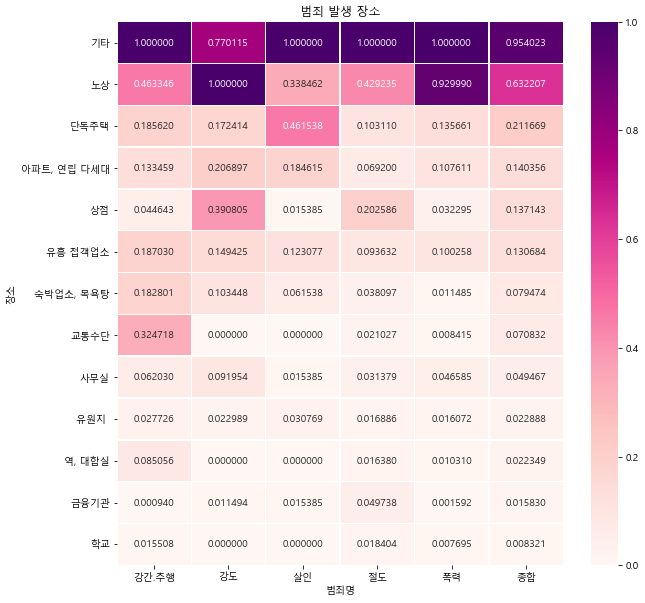

In [160]:
crime_loc_norm_sort = crime_loc_norm.sort_values('종합',ascending=False) #내림차순

def drawGraph() :
    plt.figure(figsize=(10,10))
    sns.heatmap(
        crime_loc_norm_sort,    
        annot=True,     
        fmt='f',     
        linewidths=0.5,    
        cmap = 'RdPu'
    )
    plt.title('범죄 발생 장소')
    plt.show()
drawGraph() 